In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm

myparams = {
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'font.family': 'Djvu Serif',
    'font.size': 14,
    'axes.grid': True,
    'grid.alpha': 0.1,
    'lines.linewidth': 2
}

plt.rcParams.update(myparams)

%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2

/Users/kisnikser/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
figures_path = "../figs/"
#figures_path = "../figs/gray/"

format = "pdf"
#format = "eps"

if figures_path == "../figs/gray/":
    from cycler import cycler
    monochrome = (cycler('color', ['k']) * cycler('marker', ['', '.']) *
                  cycler('linestyle', ['-', '--', ':', '-.']))
    plt.rc('axes', prop_cycle=monochrome)
    
#figures_path += f"{format}/"

In [3]:
from population import Population
from chromosome import Chromosome
from algorithm import Algorithm
from ga_operations import *

In [4]:
import os
import pickle

def save_object(obj, filename):
    # Overwrites any existing file.
    with open(filename, 'wb') as outp:
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)


def load_object(filename):
    with open(filename, 'rb') as inp:
        obj = pickle.load(inp)
        return obj

# Regression

In [5]:
results_regression = load_object("../dumps/datasets_regression.pkl")

In [7]:
POP_SIZE = 1000 #number of chromosomes in population
NUM_FOR_SELECTION = POP_SIZE // 3 #number of chromosomes to be chosen for selection
FUNCTIONS = {1: ['sin', 'cos', 'exp', 'log', 'ctg', 'cth'], 
             2: ['+', '-', '*', '/']} # unary and binary functions
DEPTH = 1 # initial depth of trees
MAX_DEPTH = 4 # maximum depth of a tree 
NUMBER_ITERS = 1000 # number of iterations

pop = Population(POP_SIZE, NUM_FOR_SELECTION, FUNCTIONS, DEPTH, MAX_DEPTH) # create the population
alg = Algorithm(pop, NUMBER_ITERS, datasets=results_regression, epoch_feedback=100) # create the algorithm
best = alg.train() #train the alrogithm

Training process has started
[Epoch 100/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0016361594107230976
[Epoch 200/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0016361594107230976
[Epoch 300/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0016361594107230976
[Epoch 400/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0016361594107230976
[Epoch 500/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0016361594107230976
[Epoch 600/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0016361594107230976
[Epoch 700/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0016361594107230976
[Epoch 800/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0016361594107230976
[Epoch 900/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0016361594107230976
[Epoch 1000/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.0016361594107230976


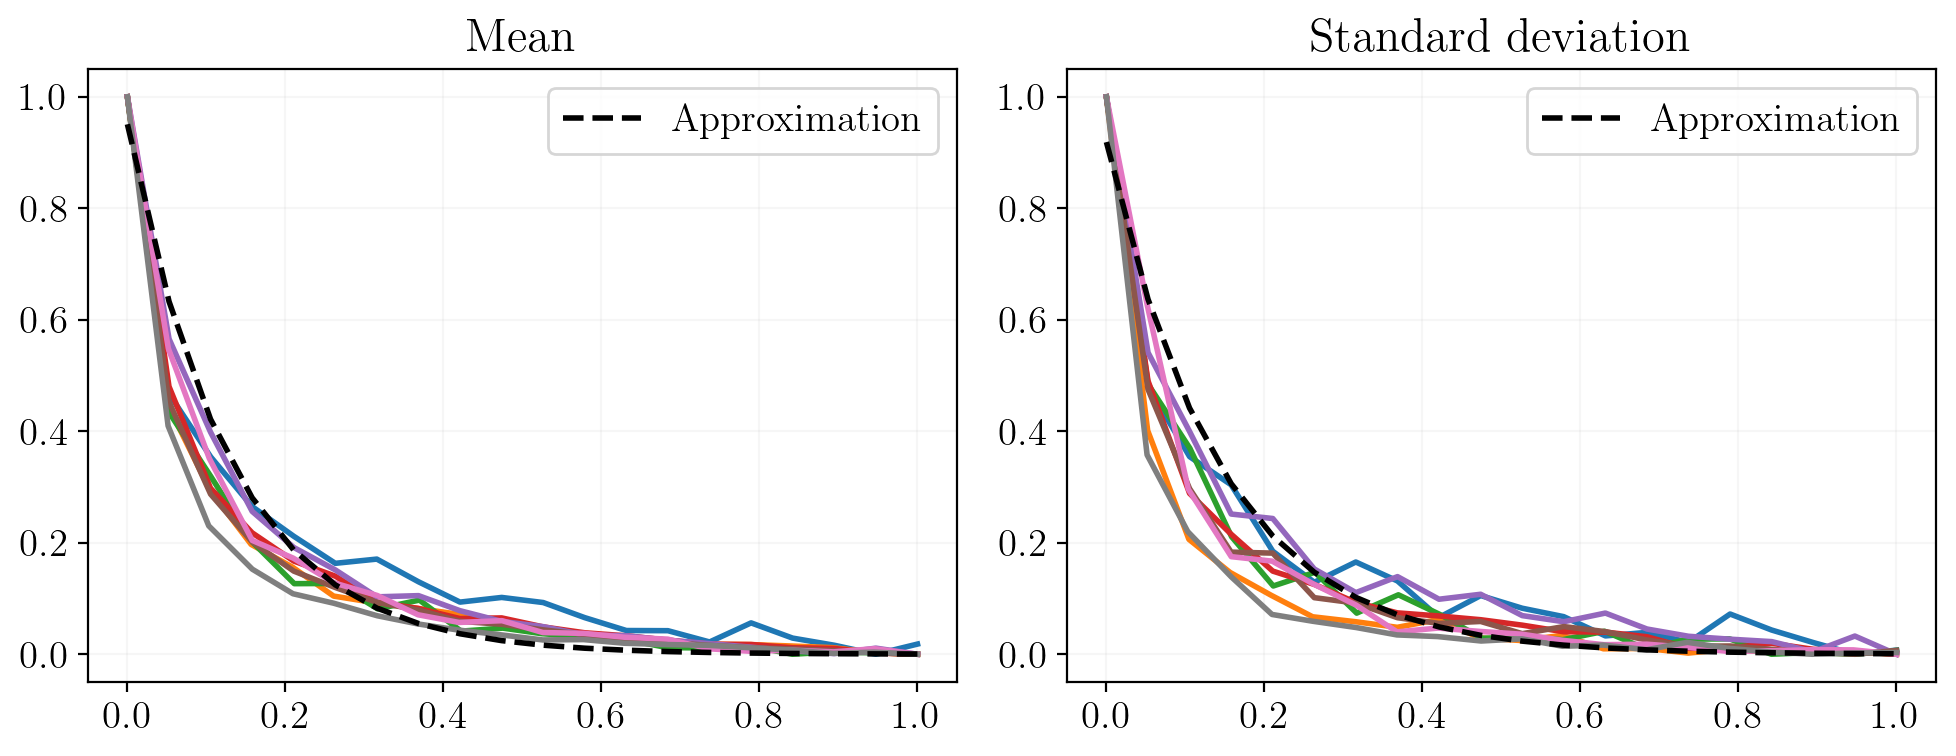

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

for name in results_regression.keys():
    sample_sizes = results_regression[name]['sample_sizes']
    mean = results_regression[name]['mean']
    std = results_regression[name]['std']
    x_vals = sample_sizes - min(sample_sizes)
    x_vals = x_vals / max(x_vals)
    y_vals_mean = mean - min(mean)
    y_vals_mean = y_vals_mean / max(y_vals_mean)
    y_vals_std = std - min(std)
    y_vals_std = y_vals_std / max(y_vals_std)
    ax1.plot(x_vals, y_vals_mean) #, label=name)
    ax2.plot(x_vals, y_vals_std) #, label=name)

#print(best) # print best function
#print(f"MSE: {best.calculate_fitness(X=x_vals, y=y_vals)}")

sample_sizes = results_regression['Parkinsons Telemonitoring']['sample_sizes']
mean = results_regression['Parkinsons Telemonitoring']['mean']
std = results_regression['Parkinsons Telemonitoring']['std']
x_vals = sample_sizes - min(sample_sizes)
x_vals = x_vals / max(x_vals)
y_vals_mean = mean - min(mean)
y_vals_mean = y_vals_mean / max(y_vals_mean)
y_vals_std = std - min(std)
y_vals_std = y_vals_std / max(y_vals_std)

best.calculate_fitness(X=x_vals, y=y_vals_mean)
y_pred_mean = [best.evaluate(x, best.w_opt) for x in x_vals] #predictions of our best calculated function
best.calculate_fitness(X=x_vals, y=y_vals_std)
y_pred_std = [best.evaluate(x, best.w_opt) for x in x_vals] #predictions of our best calculated function
 
ax1.plot(x_vals, y_pred_mean, color='black', linestyle='dashed', label='Approximation')  #plot original function
ax2.plot(x_vals, y_pred_std, color='black', linestyle='dashed', label='Approximation')  #plot original function
ax1.legend()
ax2.legend()
ax1.set_title('Mean')
ax2.set_title('Standard deviation')
plt.tight_layout()
plt.savefig(figures_path+"datasets-regression.pdf", bbox_inches="tight")
plt.show()

In [9]:
print(best)

w[0]*exp(w[1]*x)


$$ w_0 + w_1 \cdot \exp(w_2 \cdot x) $$

# Classification

In [10]:
results_classification = load_object("../dumps/datasets_classification.pkl")

In [11]:
POP_SIZE = 1000 # number of chromosomes in population
NUM_FOR_SELECTION = POP_SIZE // 3 # number of chromosomes to be chosen for selection
FUNCTIONS = {1: ['sin', 'cos', 'exp', 'log', 'ctg', 'cth'], 
             2: ['+', '-', '*', '/']} # unary and binary functions
DEPTH = 1 # initial depth of trees
MAX_DEPTH = 8 # maximum depth of a tree 
NUMBER_ITERS = 1000 # number of iterations

pop = Population(POP_SIZE, NUM_FOR_SELECTION, FUNCTIONS, DEPTH, MAX_DEPTH) # create the population
alg = Algorithm(pop, NUMBER_ITERS, datasets=results_classification, epoch_feedback=100) # create the algorithm
best = alg.train() #train the alrogithm

Training process has started
[Epoch 100/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.005751867321559132
[Epoch 200/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.005751867321559132
[Epoch 300/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.005751867321559132
[Epoch 400/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.005751867321559132
[Epoch 500/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.005751867321559132
[Epoch 600/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.005751867321559132
[Epoch 700/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.005751867321559132
[Epoch 800/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.005751867321559132
[Epoch 900/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.005751867321559132
[Epoch 1000/1000]
- Best function: w[0]*exp(w[1]*x)
- Best fitness: 0.005751867321559132


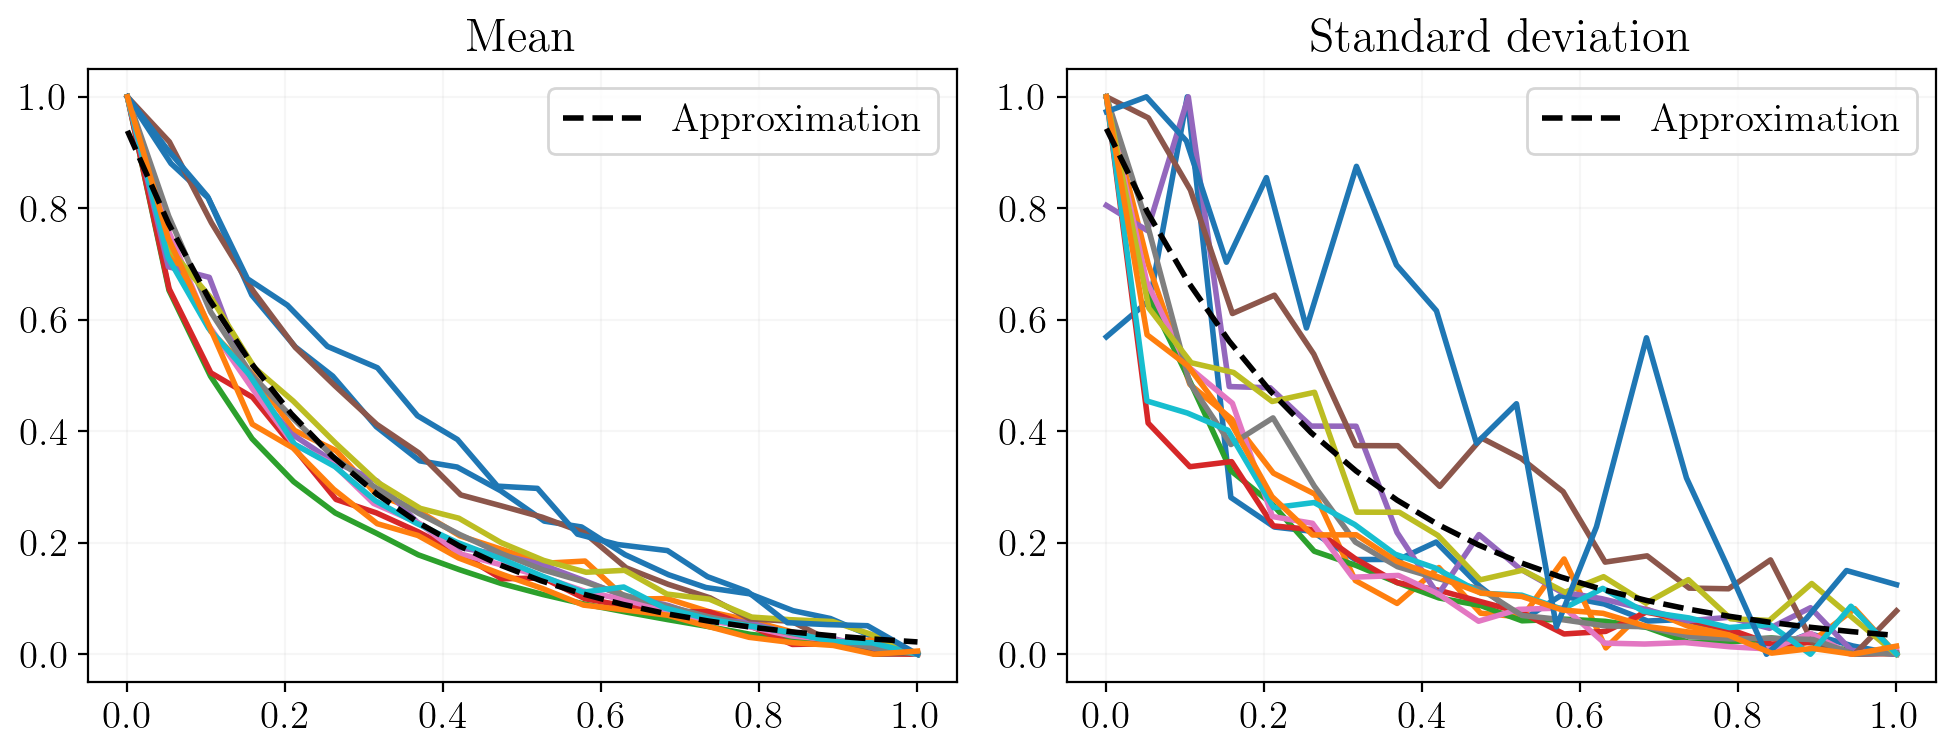

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

for name in results_classification.keys():
    sample_sizes = results_classification[name]['sample_sizes']
    mean = results_classification[name]['mean']
    std = results_classification[name]['std']
    x_vals = sample_sizes - min(sample_sizes)
    x_vals = x_vals / max(x_vals)
    y_vals_mean = mean - min(mean)
    y_vals_mean = y_vals_mean / max(y_vals_mean)
    y_vals_std = std - min(std)
    y_vals_std = y_vals_std / max(y_vals_std)
    ax1.plot(x_vals, y_vals_mean) #, label=name)
    ax2.plot(x_vals, y_vals_std) #, label=name)

#print(best) # print best function
#print(f"MSE: {best.calculate_fitness(X=x_vals, y=y_vals)}")

sample_sizes = results_classification['Glass Identification']['sample_sizes']
mean = results_classification['Glass Identification']['mean']
std = results_classification['Glass Identification']['std']
x_vals = sample_sizes - min(sample_sizes)
x_vals = x_vals / max(x_vals)
y_vals_mean = mean - min(mean)
y_vals_mean = y_vals_mean / max(y_vals_mean)
y_vals_std = std - min(std)
y_vals_std = y_vals_std / max(y_vals_std)

best.calculate_fitness(X=x_vals, y=y_vals_mean)
y_pred_mean = [best.evaluate(x, best.w_opt) for x in x_vals] #predictions of our best calculated function
best.calculate_fitness(X=x_vals, y=y_vals_std)
y_pred_std = [best.evaluate(x, best.w_opt) for x in x_vals] #predictions of our best calculated function
 
ax1.plot(x_vals, y_pred_mean, color='black', linestyle='dashed', label='Approximation')  #plot original function
ax2.plot(x_vals, y_pred_std, color='black', linestyle='dashed', label='Approximation')  #plot original function
ax1.legend()
ax2.legend()
ax1.set_title('Mean')
ax2.set_title('Standard deviation')
plt.tight_layout()
plt.savefig(figures_path+"datasets-classification.pdf", bbox_inches="tight")
plt.show()

In [13]:
print(best)

w[0]*exp(w[1]*x)


$$ w_0 + w_1 \cdot \exp(w_2 \cdot x) $$